In [2]:
import numpy as np
import matplotlib.pyplot as plt    
import pandas as pd
import sys 
sys.path.append('../../modules')
import matplotlib_config as mconf 
_ = mconf.set_standard_layout()

Pupose of this notebook is to compare the discrepancy from assuming serial resistances against our continous model which takes consumption throughout the mesophyll into account. If we let $CO_2$ conc. be so low that $C_c \rightarrow C^*$ then $g_m^* \rightarrow g_m$ directly. Partitioning $g_m$ into $g_{IAS} = 2\langle D \rangle / L$ and a remainder denoted $g_{c} = \langle K \rangle L$, we can derive how much $g_m^{*}$ is reduced relative to $g_c$ for a given $g_{IAS}/g_c$ ratio, as:

* FvCB (OD): $\frac{1}{g_m} = \frac{1}{g_{IAS}} + \frac{1}{g_c}$  $\Leftrightarrow$  $\frac{g_m^*}{g_c} = \frac{1}{1 + g_{c}/g_{IAS}} = \frac{1}{1+\frac{1}{2}\tau^2}$

* This Work (1D):   $g_m^* = \sqrt{\langle K \rangle \langle D \rangle} \tanh{\sqrt{\frac{\langle K \rangle L^2}{\langle D \rangle}}}$  $\Leftrightarrow$  $\frac{g_m^*}{g_c} = \frac{1}{\tau} \tanh \tau$

The difference between the $g_m$ and $g_m^*$ values rel. to $g_c$ is thus:

$\frac{g_{m_{1D}}^*-g_{m_{0D}}^*}{g_c} = \frac{1}{\tau} \tanh \tau - \frac{1}{1+\frac{1}{2}\tau^2}$

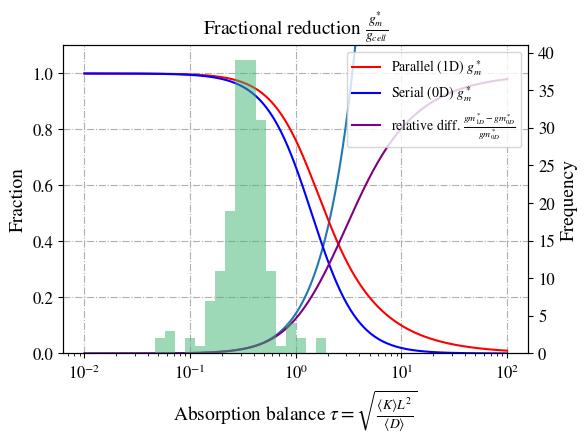

In [5]:
# This script compares the serial and parallel mesophyll conductance models
# and plots the relative difference in mesophyll conductance as a function of the absorption balance tau
taus = np.exp(np.linspace(np.log(0.01), np.log(100), 500))
gmgc = 1/(1+0.5*(taus)**2) # serial (0D) mesophyll conductance
gm_gc = 1/(taus)*np.tanh(taus) # parallel (1D) mesophyll conductance

# do a histogram of the tau distribution in data provided by Knauer et al. 2022
dfKnauer = pd.read_csv('../../data/saved_data/Knauer2022_hypostomatous.csv', sep=';', decimal=',')
taus_data = dfKnauer['tau'].to_numpy()

fig, ax = plt.subplots(figsize=(6,4))
xmin, xmax = 0.01, 100
ax_ = ax.twinx()
ax_.hist(taus_data, bins=np.logspace(np.log10(xmin), np.log10(xmax), 43), color='mediumseagreen', alpha=0.5, zorder=-1)
ax_.set_ylabel('Frequency', fontsize=14)
ax.plot(taus, gm_gc, 'r-', label=r'Parallel (1D) $g_m^*$', zorder=3)
ax.plot(taus, gmgc, 'b', label=r'Serial (0D) $g_m^*$', zorder=3)
ax.plot(taus, (gm_gc-gmgc)/gm_gc, color='purple', linestyle='-', label=r'relative diff. $\frac{gm^*_{1D} - gm^*_{0D}}{gm^*_{0D}}$', zorder=3)
ax.plot(taus, (gm_gc - gmgc)/gmgc)
ax.set_xscale('log')
ax.set_ylim(0, 1.1)
ax.set_xlabel(r'Absorption balance $\tau = \sqrt{\frac{\langle K \rangle L^2}{\langle D \rangle}}$', fontsize=14)
ax.set_ylabel(r'Fraction', fontsize=14)
ax.set_title(r'Fractional reduction $\frac{g_m^{*}}{g_{cell}}$', fontsize=14)
ax.grid(linestyle='-.')
ax.legend(loc='upper right', fontsize=10)
plt.show()

#### Overview of different percentiles relating to the data provided by Knauer et al. 2022

Also available in Table 2, supplementary S5

In [4]:
# Relative difference between 1D parallel and 0D serial modified mesophyll conductance gm*
rel_error = (gm_gc-gmgc)/gmgc

print(f'Relative error larger than 1 % for tau > {taus[rel_error > 0.01][0]:.3f}')
print(f'Relative error larger than 2 % for tau > {taus[rel_error > 0.02][0]:.3f}')
print(f'Relative error larger than 5% for tau > {taus[rel_error > 0.05][0]:.3f}')
print(f'Relative error larger than 10% for tau > {taus[rel_error > 0.10][0]:.3f}')
print(f'For the most extreme point at tau = {taus_data.max():.3f}, the relative error is {100*rel_error[np.argmin(np.abs(taus - taus_data.max()))]:.1f} %')  
print("______________")

print(f'Fraction with a relative error larger than 1% is: {100*np.sum(taus_data > 0.248)/len(taus_data):.1f} %')
print(f'Fraction with a relative error larger than 2% is: {100*np.sum(taus_data > 0.352)/len(taus_data):.1f} %')
print(f'Fraction with a relative error larger than 5% is: {100*np.sum(taus_data > 0.570)/len(taus_data):.1f} %')
print(f'Fraction with a relative error larger than 10% is: {100*np.sum(taus_data > 0.824)/len(taus_data):.1f} %')

Relative error larger than 1 % for tau > 0.248
Relative error larger than 2 % for tau > 0.352
Relative error larger than 5% for tau > 0.570
Relative error larger than 10% for tau > 0.824
For the most extreme point at tau = 1.630, the relative error is 32.3 %
______________
Fraction with a relative error larger than 1% is: 81.0 %
Fraction with a relative error larger than 2% is: 48.9 %
Fraction with a relative error larger than 5% is: 6.9 %
Fraction with a relative error larger than 10% is: 4.6 %
